In [1]:
import os
import geopandas as gpd
import pandas as pd
import gc

In [2]:
%load_ext autoreload
import icebath as icebath
from icebath.core import bathy_workflow
%autoreload 2

In [ ]:
# import dask
# from dask.distributed import Client, LocalCluster
# client = Client(processes=False) #, n_workers=2, threads_per_worker=3, memory_limit='6GB')
# client

In [3]:
# set up variables to run
# inpardir = '/Users/jessica/projects/bathymetry_from_bergs/DEMs/2m/'
# fjord = 'JI'
# metastr='_mdf'

inpardir = '/Users/jessica/projects/bathymetry_from_bergs/DEMs/KaneWV02/'
fjord="KB"
metastr="_meta"

outdir = "/Users/jessica/projects/bathymetry_from_bergs/results/"

In [4]:
dirlist = [d for d in os.listdir(inpardir) if not d.startswith('.')]

In [5]:
print(dirlist)

['WV02_20180520_103001007D4DA200_103001007E6E7600_2m_lsf_v030403a', 'WV02_20180520_103001007D4DA200_103001007E6E7600_2m_lsf_v030403b']


In [6]:
def recursive_dir_size(path):
    size = 0

    for x in os.listdir(path):
        if not os.path.isdir(os.path.join(path,x)):
            size += os.stat(os.path.join(path,x)).st_size
        else:
            size += recursive_dir_size(os.path.join(path,x))

    # convert to GB
    size = size / (1024.0**3)
    
    return size

/Users/jessica/projects/bathymetry_from_bergs/github/icebath/icebath/core/build_xrds.py:22: UserWarning: This function currently assumes a constant grid and EPSG for all input files
  warnings.warn("This function currently assumes a constant grid and EPSG for all input files")


WV02_20180520_103001007D4DA200_103001007E6E7600_2m_lsf_seg1_dem.tif
Please note the transform is computed assuming a coordinate reference system    where x(min) is west and y(min) is south
Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset
Note that tide model and epsg are hard coded in!
They can also be provided as keywords if the wrapper function is updated to handle them
The current fjord does not have a minimum berg size entry - using a default value!
NOT USING DASK
Got labeled raster of potential icebergs for an image
done rasterizing and getting possible icebergs
69
median iceberg freeboard less than 15 m
median iceberg freeboard less than 15 m
median iceberg freeboard less than 15 m
median iceberg freeboard less than 15 m
median iceberg freeboard less than 15 m
median iceberg freebo

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jessica/projects/bathymetry_from_bergs/DEMs/KaneRun/WV02_20180520_103001007D4DA200_103001007E6E7600_2m_lsf_v030403b'

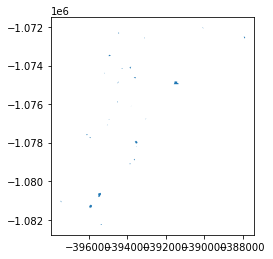

In [7]:
# run the bathymetry-from-iceberg-freeboard workflow on each dem (skipping larger dirs for now)
for indir in dirlist:
#     print(indir)
    try:
#         print(recursive_dir_size(inpardir+indir))
        if recursive_dir_size(inpardir+indir) < 0.75:
            bathy_workflow.run_workflow(inpardir+indir+'/', fjord, outdir, indir[0:14] + "icebergs.gpkg", metastr=metastr, bitmask=True)
        else:
            continue
        gc.collect()
    except NotADirectoryError:
        if recursive_dir_size(inpardir+indir) < 0.75:
            bathy_workflow.run_workflow(inpardir+'/', fjord, outdir, "JIicebergs.gpkg", metastr=metastr)
            break
        else:
            continue        

In [11]:
reslist = [f for f in os.listdir(outdir) if f.endswith('.gpkg')]

In [12]:
print(reslist)

['WV03_20170423_icebergs.gpkg', 'WV02_20180723_icebergs.gpkg', 'WV03_20180322_icebergs.gpkg', 'WV02_20180520_icebergs.gpkg', 'WV03_20170502_icebergs.gpkg', 'WV02_20170629_icebergs.gpkg']


In [13]:
# combine the geopackages into one geodataframe
gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(outdir+res) for res in reslist],
                                 ignore_index=True), crs=gpd.read_file(outdir+reslist[0]).crs)

In [14]:
gdf

,sl_adjust,fjord,date,tidal_ht_offset,tidal_ht_min,tidal_ht_max,filtered_draft_med,filtered_draft_max,filtered_draft_mad,filtered_draft_err,bmach_bed,bmach_errbed,bmach_source,ibcao_bed,ibcao_source,geometry
0,5.841411,KB,2017-04-23T22:59:16,-0.892277,-1.941122,1.883464,105.546301,150.895465,22.407587,24.558913,-79.192089,200.000000,-15.0,-80.188817,70.0,"POLYGON ((-380465.631 -1023952.603, -380465.88..."
1,5.392780,KB,2017-04-23T22:59:16,-0.892277,-1.941122,1.883464,110.164935,158.240884,26.118010,25.198785,-88.997867,200.000000,-15.0,-89.873710,70.0,"POLYGON ((-380687.560 -1025530.366, -380688.24..."
2,3.220372,KB,2018-07-23T23:16:59,0.136285,-1.175676,1.459404,115.384647,175.637764,20.393256,23.773103,-181.495733,200.000000,4.0,-178.180697,70.0,"POLYGON ((-385691.045 -1069572.676, -385691.01..."
3,1.441052,KB,2018-07-23T23:16:59,0.136285,-1.175676,1.459404,262.830316,358.401707,65.084351,48.448781,-180.005600,200.000000,-15.0,-175.838106,70.0,"POLYGON ((-384057.816 -1070341.648, -384059.32..."
4,4.742662,KB,2018-07-23T23:16:59,0.136285,-1.175676,1.459404,104.510665,146.355051,35.087008,22.107615,-138.560000,200.000000,-15.0,-139.318342,70.0,"POLYGON ((-394704.748 -1078594.221, -394705.69..."
5,6.412951,KB,2018-03-22T18:47:17,0.869531,-1.328932,1.513495,186.435581,228.743883,43.072202,35.510772,-129.880000,200.000000,4.0,-131.023964,70.0,"POLYGON ((-393436.933 -1078616.180, -393437.01..."
6,5.633614,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,108.206413,126.196552,13.951698,23.018862,-168.906667,200.000000,-15.0,-166.686840,70.0,"POLYGON ((-390049.326 -1072063.843, -390050.13..."
7,2.751486,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,200.873628,246.753681,50.925089,38.015387,-180.893333,200.000000,4.0,-179.952801,70.0,"POLYGON ((-394454.577 -1072331.499, -394455.29..."
8,5.521962,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,102.623028,130.260819,17.730234,22.186708,-162.546667,200.000000,-15.0,-158.922404,70.0,"POLYGON ((-387929.935 -1072491.158, -387930.88..."
9,5.806507,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,148.290247,178.643092,21.793840,29.298987,-173.200000,200.000000,4.0,-171.475404,70.0,"POLYGON ((-393101.515 -1072577.596, -393101.51..."


In [15]:
outfn = fjord + "_combined_results.gpkg"
gdf.to_file(outdir+outfn, driver="GPKG")

In [16]:
from icebath.utils import plot as ibplot

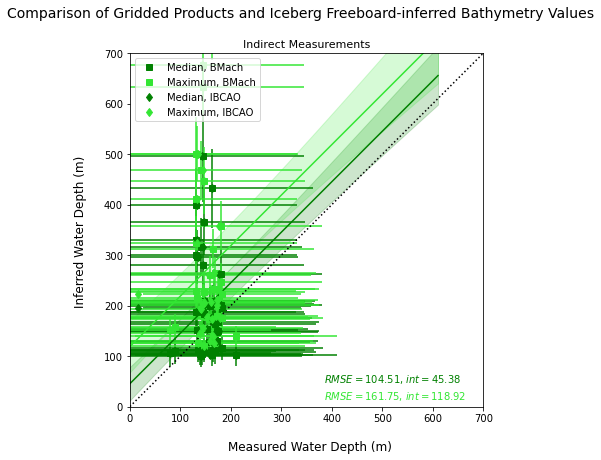

In [18]:
ibplot.meas_vs_infer_fig(gdf, save=False)